## Data Visualiazation of Supply Sales with Streamlit Framework

In [1]:
# library data-visualization
import numpy as np
import pandas as pd
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 1000)

# library manipulation data
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Acquisition

In [2]:
# load-dataset with parse date
dataset = pd.read_csv("dataset/dataset-supply.csv", parse_dates=["Ship Date"])

# convert month to object
dataset['Month'] = dataset['Ship Date'].dt.month
dataset['Month'] = dataset['Month'].astype(object)

# convert int64 to object 
dataset['Year'] = dataset['Year'].astype(object)

# show-metadata
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Ship Date     8092 non-null   datetime64[ns]
 1   Month         8092 non-null   object        
 2   Year          8092 non-null   object        
 3   Ship Mode     8092 non-null   object        
 4   Area          8092 non-null   object        
 5   Region        8092 non-null   object        
 6   Category      8092 non-null   object        
 7   Sub-Category  8092 non-null   object        
 8   Sold          8092 non-null   int64         
 9   Profit        8092 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 632.3+ KB


In [3]:
print(dataset)

      Ship Date Month  Year       Ship Mode        Area Region         Category Sub-Category  Sold   Profit
0    2016-11-11    11  2016    Second Class        Jawa  South        Furniture    Bookcases   270   503000
1    2016-11-11    11  2016    Second Class     Sumatra  South        Furniture       Chairs   740  2635000
2    2016-06-16     6  2016    Second Class        Bali   West  Office Supplies       Labels    20    82500
3    2015-10-18    10  2015  Standard Class       Papua  South  Office Supplies      Storage    30    30200
4    2014-06-14     6  2014  Standard Class    Sulawesi   West        Furniture  Furnishings    50   170100
...         ...   ...   ...             ...         ...    ...              ...          ...   ...      ...
8087 2014-01-23     1  2014    Second Class    Sulawesi  South        Furniture  Furnishings    30    49300
8088 2017-03-03     3  2017  Standard Class  Kalimantan   West        Furniture  Furnishings   100   187600
8089 2017-03-03     3  2017 

### 2. Exploration Data Analysis

In [4]:
# Show min-max datetime
print("Min Date : "+str(dataset["Ship Date"].min()))
print("Max Date : "+str(dataset["Ship Date"].max()))

Min Date : 2014-01-07 00:00:00
Max Date : 2017-12-31 00:00:00


In [5]:
# show unique values years
dataset["Year"].sort_values().unique()

array([2014, 2015, 2016, 2017], dtype=object)

In [6]:
# show unique ship 
dataset["Ship Mode"].sort_values().unique()

array(['First Class', 'Same Day', 'Second Class', 'Standard Class'],
      dtype=object)

In [7]:
# show unique area
dataset["Area"].sort_values().unique()

array(['Bali', 'Jawa', 'Kalimantan', 'Papua', 'Sulawesi', 'Sumatra'],
      dtype=object)

In [8]:
# show unique region
dataset["Region"].sort_values().unique()

array(['Central', 'East', 'South', 'West'], dtype=object)

In [9]:
# show unique category
dataset["Category"].sort_values().unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
# show unique sub-category
dataset["Sub-Category"].sort_values().unique()

array(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases',
       'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings',
       'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies',
       'Tables'], dtype=object)

In [11]:
# show min-max values sold
print("Min values sold : "+str(dataset["Sold"].min()))
print("Max values sold : "+str(dataset["Sold"].max()))

Min values sold : 10
Max values sold : 17500


In [12]:
# show min-max values profit
print("Min values sold : "+str(dataset["Profit"].min()))
print("Max values sold : "+str(dataset["Profit"].max()))

Min values sold : 0
Max values sold : 100799800


In [13]:
def profit(df, category):

    # calculate profit by some category
    sum_profit = df.query("Category == @category")["Profit"].sum()
    sum_profit = "{:,}".format(sum_profit)

    return sum_profit

In [14]:
print("Profit Furniture : "+str(profit(dataset, 'Furniture')))

Profit Furniture : 946,090,000


In [15]:
print("Profit Office Supplies : "+str(profit(dataset, 'Office Supplies')))

Profit Office Supplies : 2,142,769,900


In [16]:
print("Profit Technology : "+str(profit(dataset, 'Technology')))

Profit Technology : 2,208,134,900


In [17]:
# calculate total profit
print("{:,}".format(dataset["Profit"].sum()))

5,296,994,800


### 3. An Analysis Pivot Tabel

In [18]:
def pivot(data, columns, columns_name):

    # 1. Process pivot table
    df = pd.pivot_table(data=data, index="Category", columns=columns, values="Sold", aggfunc="sum")

    # 2. change columns name
    df.columns = columns_name

    # 3. reset index
    df = df.reset_index()

    # return values
    return df

In [19]:
# calculate pivot table
df_month = pivot(data=dataset, columns="Month", columns_name=dataset["Month"].sort_values().unique().tolist())
print(df_month)

          Category      1      2      3      4      5      6      7      8      9     10      11     12
0        Furniture  21570  10910  28990  25230  28980  38860  35480  26100  71850  33140   73460  94320
1  Office Supplies  36320  21870  48360  39660  41430  48860  40400  57120  85820  48670   89570  92980
2       Technology  27250  28090  64340  45610  53920  53710  46950  45770  73810  87480  102240  92780


In [20]:
# calculate pivot table
df_year = pivot(data=dataset, columns="Year", columns_name=dataset["Year"].sort_values().unique().tolist())
print(df_year)

          Category    2014    2015    2016    2017
0        Furniture  100460  116160  136660  135610
1  Office Supplies  132840  126560  170940  220720
2       Technology  119840  152660  208900  240550


In [21]:
# calculate pivot table
df_ship_mode = pivot(data=dataset, columns="Ship Mode", columns_name=dataset["Ship Mode"].sort_values().unique().tolist())
print(df_ship_mode)

          Category  First Class  Same Day  Second Class  Standard Class
0        Furniture        72430     23700        106740          286020
1  Office Supplies        94410     28890        146260          381500
2       Technology       128840     49340        130040          413730


In [22]:
# calculate pivot table
df_area = pivot(data=dataset, columns="Area", columns_name=dataset["Area"].sort_values().unique().tolist())
print(df_area)

          Category   Bali    Jawa  Kalimantan   Papua  Sulawesi  Sumatra
0        Furniture  69880   53430      103160   94320     92870    75230
1  Office Supplies  81500   90510      125980  133000    116750   103320
2       Technology  93280  107560      131800  161040    137640    90630


In [23]:
# calculate pivot table
df_region = pivot(data=dataset, columns="Region", columns_name=dataset["Region"].sort_values().unique().tolist())
print(df_region)

          Category  Central    East   South    West
0        Furniture    79310  123000   86150  200430
1  Office Supplies   138590  184870  109370  218230
2       Technology   148800  219890  109220  244040


### 4. Data Visualization

In [24]:
# choose category
category = "Technology" # Furniture, Office Supplies, Technology

In [25]:
def lineplot(data):

    # create figure
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(data=data, x="Labels", y="Percent")

    # set labels
    ax.set_title("", fontsize=14)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.grid(True)

    # custom labes
    ax.set_xticks(np.arange(1,13,1))
    ax.set_yticks(np.arange(0, 26, 5))

    # show plot
    plt.tight_layout()
    plt.show()

In [26]:
def barplot(data):
    
    # create figure
    fig, ax = plt.subplots(figsize=(8,4))
    sns.barplot(data=data, x="Labels", y="Percent", hue="Labels", palette="YlGn", legend=False)

    # set labels
    ax.set_title("", fontsize=14)
    ax.set_xlabel("", fontsize=12)
    ax.set_ylabel("", fontsize=12)
    ax.grid(True)

    # custom labes
    ax.set_yticks(np.arange(0, 61, 10))

    # show plot
    plt.tight_layout()
    plt.show()

In [27]:
def unpivot(df, category):

    # 1. unpivot table
    df = pd.melt(df.query("Category == @category"), id_vars=["Category"], var_name="Labels", value_name="Values")

    # 2. calculate percente
    df["Percent"] = np.round(df["Values"] / df["Values"].sum()*100)

    return df

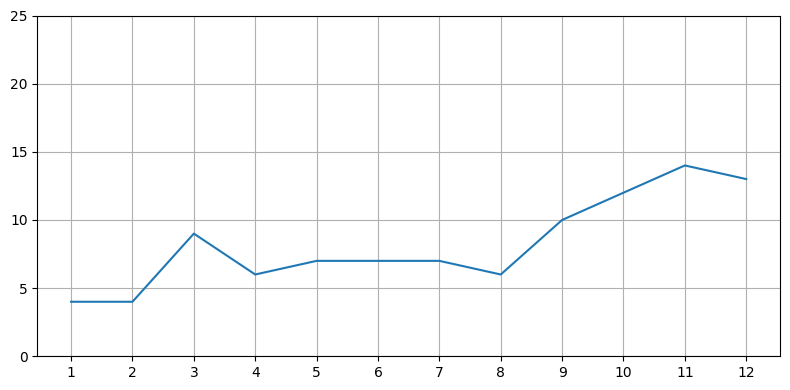

In [28]:
# convert to unpivot
df = unpivot(df_month, category)
df = df.sort_values(by="Values", ascending=True)

# show results
lineplot(df) 

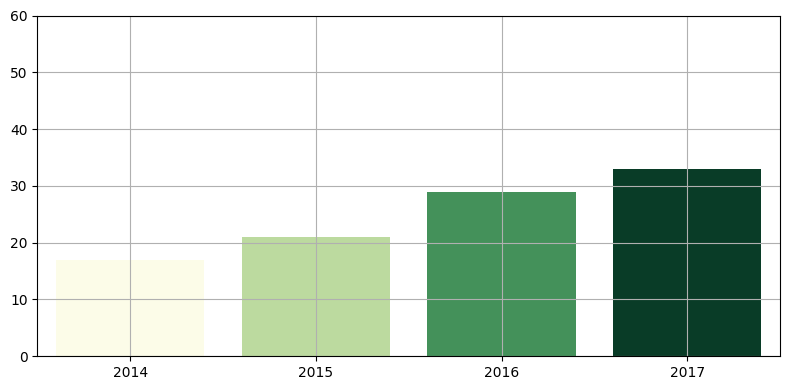

In [29]:
# convert to unpivot
df = unpivot(df_year, category)
df = df.sort_values(by="Values", ascending=True).tail(4)

# show results
barplot(df) 

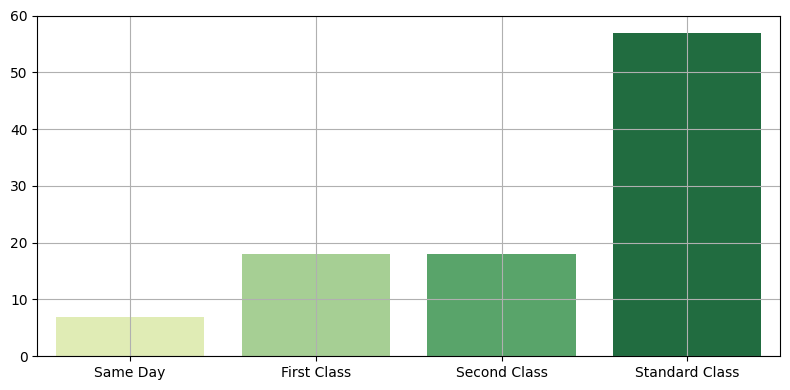

In [30]:
# convert to unpivot
df = unpivot(df_ship_mode, category)
df = df.sort_values(by="Values", ascending=True).tail(4)

# show results
barplot(df) 

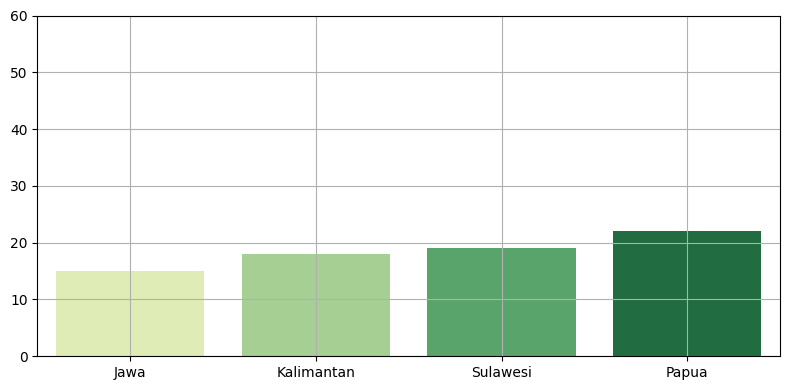

In [31]:
# convert to unpivot
df = unpivot(df_area, category)
df = df.sort_values(by="Values", ascending=True).tail(4)

# show results
barplot(df) 

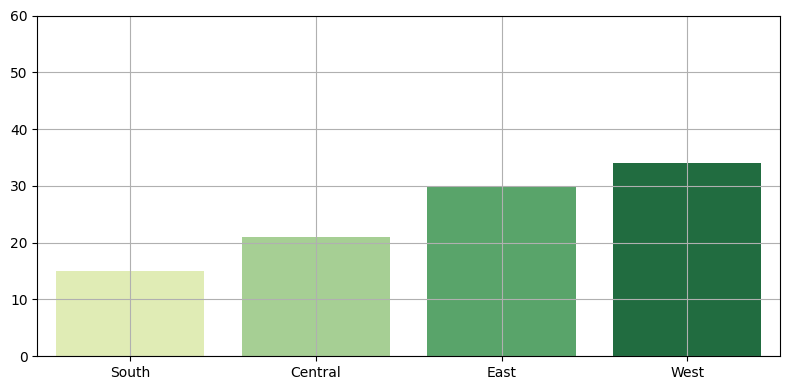

In [32]:
# convert to unpivot
df = unpivot(df_region, category)
df = df.sort_values(by="Values", ascending=True).tail(4)

# show results
barplot(df) 